# Observe Datasets
_Load data. Check size, head, tail. Identify trends in missing values._

The GLIMS data package includes GLIMS files for hypsometry, images, lines, points, and polygons. The last four are explored here, with an emphasis on polygons. According to the GLIMS data package README:

- the images file includes information on images linked to the glaciers. (but not the images).
- the lines file includes line features representing glacier snow lines and center lines.
- the points file includes representative points for glaciers.
- the polygons file includes polygon features representing glacier outlines and some other outlines.


In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Check working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Ask pandas to display all columns
pd.set_option('display.max_columns', None)

Current Directory: /Users/yun/Documents/glimsbook/GLIMS_20230716


In [2]:
# Load Esri shapefiles as geopandas dataframes
images = gpd.read_file("glims_download_13173/glims_images.shp") 
lines = gpd.read_file("glims_download_13173/glims_lines.shp")
points = gpd.read_file("glims_download_13173/glims_points.shp")
polygons = gpd.read_file("glims_download_13173/glims_polygons.shp")

In [3]:
# Check their size
print(
    "images", images.shape,
    "\nlines", lines.shape,
    "\npoints", points.shape,
    "\npolygons", polygons.shape
)

images (1772, 5) 
lines (2832, 9) 
points (328116, 2) 
polygons (565887, 31)


Compare results with [Summary Statistics](http://glims.colorado.edu/glacierdata/db_summary_stats.php) page, which has an unknown date of last update.

| Basic Statistic | Summary Statistics Report | Corresponding* EDA Result |
| --------------- | --------------- | --------------- |
| Number of glaciers    | 444740** (200,000)    | 328116 (points)    |
| Number of glacier analyses (snapshots)    | 699217    | 565887 (polygons)   |
| Row 3, Col 1    | Row 3, Col 2    | Row 3, Col 3    |

*Assuming that points features represent unique glaciers, and based on relative quantities, polygons may correspond to glacier analyses.

** Summary Statistics page notes that glaciers with multiple IDs has caused double-counting
Assuming the representative points for glaciers

By comparing relative quantitatives, 


Note: These numbers include some double-counting of glaciers in cases where multiple outlines exist for the same glacier but don't share the same glacier ID. The result is that the totals for glacier number and glacier area are too high for the current state of glaciers. We expect this to be fixed soon. 


Area of glacier coverage (latest snapshot), km2	1.20007e+06
Note: A good working number for area is approximately 750,000 km2 (not including the ice sheets of Greenland and Antarctica).
Earliest analysis	1750-01-01
Most recent analysis	2021-02-26
Number of glaciers with multi-temporal coverage	173148

There are more polygon features than glaciers (representative points). Brainstorm explanations:
- Polygon features include more than glacier outlines, so would be more numerous than number of glaciers.
- Some glaciers are not represented by only one polygon feature. When might glaciers be represented by >1 or 0 polygons?
- Duplicate polygons or multiple versions of polygons for some glaciers. Summary statistics posit that 173148 glaciers have multi-temporal coverage.

There are far fewer lines and images than glaciers. 
- Understand [snow lines](https://nsidc.org/learn/cryosphere-glossary/snow-line#:~:text=snow%20line%20%7C%20National%20Snow%20and%20Ice%20Data%20Center&text=the%20minimum%20elevation%20of%20snow,a%20glacier's%20current%20equilibrium%20line.) and center lines. They are inherent properties of glaciers. If a glacier exists and has a polygon, it should have a measurable snow line and centerline. So this data may be incomplete, unless many glaciers don't exist or have polygons?
- Research image database. Data incomplete. 



In [4]:
# Initial look at data
images.sample(5)

,inst_sname,orig_id,acq_time,est_loc,geometry
1611,Landsat7,LE70980212000266XXX00,2000-09-22 00:00:00,1,POINT Z (12.45700 -17.49018 0.00000)
531,Landsat7,LMS78_903075W097_125016,2001-10-01 00:00:00,0,POINT Z (-100.00798 -78.12499 0.00000)
294,RADARSAT-1,RADARSAT-1 SAR Mosaic; W048T021,None,0,POINT Z (0.00000 0.00000 0.00000)
54,Landsat7,L71138041_04120011120,2001-11-20 00:00:00,0,POINT Z (0.00000 0.00000 0.00000)
322,TM4,LT51330401998289BKT00,1998-10-16 00:00:00,0,POINT Z (0.00000 0.00000 0.00000)


In [5]:
# Initial look at data
lines.sample(5)

,line_type,anlys_id,glac_id,anlys_time,src_date,rec_status,subm_id,release_dt,geometry
539,snow_line,5288.0,G227420E57260N,2006-03-15T18:00:31,2003-08-07T20:11:15,okay,306.0,2006-03-28T03:37:19,"LINESTRING Z (-132.53459 57.28511 0.00000, -13..."
1495,centerline,103587.0,G015988E78792N,2010-01-01T00:00:00,2007-09-01T00:00:00,okay,563.0,2012-12-04T00:00:00,"LINESTRING Z (15.91586 78.78408 0.00000, 15.91..."
2661,centerline,104258.0,G014562E79749N,2010-01-01T00:00:00,2005-06-07T00:00:00,okay,563.0,2012-12-04T00:00:00,"LINESTRING Z (14.51316 79.75924 0.00000, 14.51..."
614,snow_line,5320.0,G226389E58942N,2006-04-03T03:41:19,2001-08-15T00:00:00,okay,324.0,2006-03-28T03:35:09,"LINESTRING Z (-133.61136 58.94630 0.00000, -13..."
422,snow_line,4120.0,G225425E58672N,2005-11-30T19:35:25,2001-08-15T00:00:00,okay,195.0,2006-05-29T20:19:42,"LINESTRING Z (-134.58643 58.68616 0.00000, -13..."


In [6]:
# Initial look at data
points.sample(5)

,glacier_id,geometry
29771,G070489E36062N,POINT Z (70.48900 36.06200 0.00000)
63435,G074741E36651N,POINT Z (74.74100 36.65100 0.00000)
124114,G080928E30000N,POINT Z (80.92800 30.00000 0.00000)
231259,G233977E52088N,POINT Z (-126.02300 52.08800 0.00000)
323709,G336025E76871N,POINT Z (-23.97500 76.87100 0.00000)


In [7]:
# Initial look at data
polygons.sample(5)

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,mean_elev,max_elev,src_date,rec_status,glac_name,wgms_id,local_id,glac_stat,subm_id,release_dt,proc_desc,rc_id,geog_area,chief_affl,loc_unc_x,loc_unc_y,glob_unc_x,glob_unc_y,submitters,analysts,geometry
57418,glac_bound,437344.0,G073620E37961N,2015-07-16T00:00:00,0.069,0.068722,0.0,0.0,0.0,4732.0,0.0,4922.0,2002-08-30T00:00:00,okay,None,None,None,exists,637.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,50,50,80,80,"Cogley, Graham","Bolch, Tobias; Cogley, Graham; Frey, Holger; G...","POLYGON Z ((73.62218 37.96001 0.00000, 73.6215..."
227307,glac_bound,294410.0,G168317E44518S,2013-06-01T00:00:00,0.031,0.031277,0.0,0.0,0.0,0.0,0.0,0.0,1978-01-01T00:00:00,okay,None,None,None,exists,587.0,2013-09-06T16:48:00,"From RGI. glims.org/RGI Src: Trevor Chinn, Gj...",761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,50,50,80,80,"Bolch, Tobias","Chinn, Trevor","POLYGON Z ((168.31992 -44.51745 0.00000, 168.3..."
350598,glac_bound,53736.0,G276850E76865N,2005-12-17T00:09:15,0.150,0.146010,430.0,390.0,7.0,0.0,0.0,0.0,2002-07-19T17:58:00,okay,None,None,None,exists,359.0,2006-09-01T22:51:41,Orthorectified imagery;,3.0,Canada,University of Alberta,0,0,0,0,"Hartman, Gregory","Cawkwell, Fiona","POLYGON Z ((-83.15576 76.86643 0.00000, -83.14..."
259973,glac_bound,327469.0,G287716E46843S,2015-07-16T00:00:00,0.538,0.537619,0.0,0.0,0.0,0.0,0.0,0.0,2000-06-15T00:00:00,okay,None,None,None,exists,592.0,2015-07-16T00:00:00,Semi-automated glacier classification.; From R...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Colorado,50,50,80,80,"Cogley, Graham","De Angelis, Hernan; Miles, Evan; Moelg, Nico; ...","POLYGON Z ((-72.28220 -46.83780 0.00000, -72.2..."
122201,glac_bound,367947.0,G209821E59693N,2010-06-30T00:00:00,0.030,0.026500,0.0,0.0,0.0,0.0,0.0,0.0,2006-09-12T00:00:00,okay,None,None,None,exists,620.0,2010-12-14T10:35:01,Band ration TM3/TM5 plus threshold on band TM ...,561.0,Various (GlobGlacier),University of Zurich-Irchel,30,30,60,60,"Paul, Frank","Frey, Holger; Le Bris, Raymond; Paul, Frank","POLYGON Z ((-150.17598 59.69255 0.00000, -150...."


Plot them to see.

Polygons and lines too small to map if their random samples are geographically distant

In [8]:
# Load the world countries data from the Natural Earth dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check crs of all data to be mapped
print(
    world.crs,
    images.crs, 
    lines.crs,
    points.crs,
    polygons.crs
)

epsg:4326 epsg:4326 epsg:4326 epsg:4326 epsg:4326


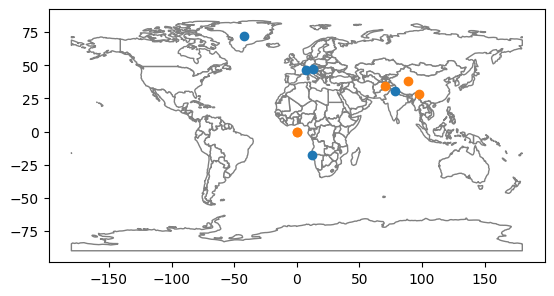

In [9]:
ax = world.plot(color='white', edgecolor='grey');
images.sample(5).plot(ax=ax);
images.sample(5).plot(ax=ax);

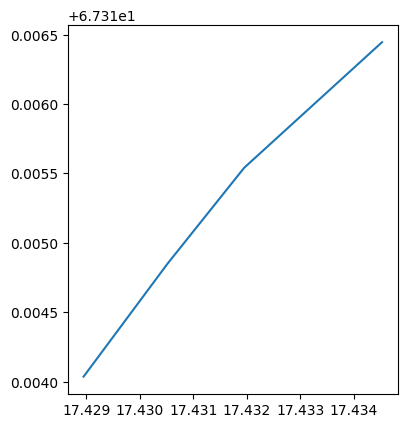

In [10]:
lines.sample(1).plot();

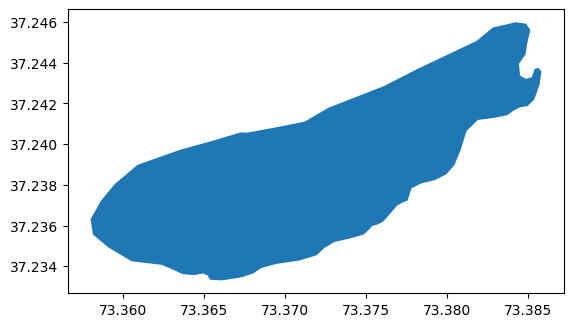

In [11]:
polygons.sample(1).plot();